In [1]:
# 匯入 Keras 模組
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# -----------------------------
# 建立序列式模型 (Sequential Model)
# -----------------------------
model = Sequential()

# -----------------------------
# 第一層卷積層 (Conv2D)
# -----------------------------
# - filters=64: 使用 64 個卷積核 (feature map)
# - kernel_size=(5,5): 卷積核大小為 5x5
# - input_shape=(32,32,3): 輸入 32x32 彩色圖像 (3 通道)
# - activation='relu': 使用 ReLU 激活函數
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='relu'))

# -----------------------------
# 第二層卷積層
# -----------------------------
# - filters=64, kernel_size=5x5, activation='relu'
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))

# -----------------------------
# 第一層池化層 (MaxPooling2D)
# -----------------------------
# - pool_size=2x2: 對每個 2x2 區塊取最大值
# - 作用: 降維、減少計算量、保留重要特徵
model.add(MaxPooling2D(pool_size=2))

# -----------------------------
# 第三層卷積層
# -----------------------------
# - filters=128, kernel_size=5x5, activation='relu'
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))

# -----------------------------
# 第四層卷積層
# -----------------------------
# - filters=128, kernel_size=5x5, activation='relu'
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))

# -----------------------------
# 第二層池化層
# -----------------------------
model.add(MaxPooling2D(pool_size=2))

# -----------------------------
# Flatten 層
# -----------------------------
# 將卷積層輸出攤平成一維向量，方便接入全連接層
model.add(Flatten())

# -----------------------------
# 輸出層 (全連接層)
# -----------------------------
# - 10 個神經元 (對應 10 類分類)
# - activation='softmax': 多分類常用，輸出為機率分布
model.add(Dense(10, activation='softmax'))

# -----------------------------
# 顯示模型摘要
# -----------------------------
# 可以看到每層輸入輸出形狀以及參數數量
model.summary()

# -----------------------------
# 編譯模型
# -----------------------------
# - optimizer='rmsprop': 優化器
# - loss='categorical_crossentropy': 多分類損失函數 (one-hot 標籤)
# - metrics=['accuracy']: 評估指標為準確率
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 727,114 (2.77 MB)

 Trainable params: 727,114 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
# 匯入 CIFAR-10 資料集
cifar10 = keras.datasets.cifar10

# -----------------------------
# 載入資料
# -----------------------------
# CIFAR-10 已經分好訓練集和測試集
# - train_data / train_label: 訓練資料與標籤
# - test_data / test_label: 測試資料與標籤
(train_data, train_label), (test_data, test_label) = cifar10.load_data()

# -----------------------------
# 保留原始訓練標籤，用於後續分析或混淆矩陣
# -----------------------------
train_label_original = train_label  # 保存整數形式的標籤

# -----------------------------
# 將標籤轉換成 one-hot 編碼
# -----------------------------
# - keras.utils.to_categorical 將整數標籤轉為 one-hot 向量
#   例如數字 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/tmp/ipython-input-2263444954.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(category[int(train_label_original[0])])


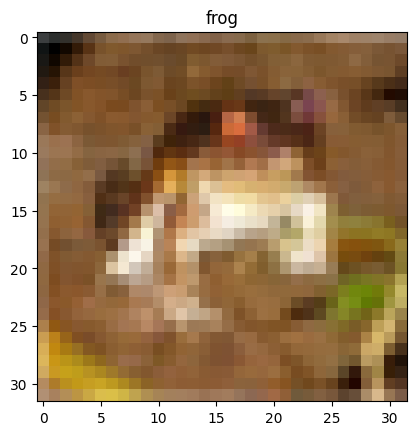

[6]


In [4]:
# 匯入 matplotlib.pyplot 模組，用於繪圖
import matplotlib.pyplot as plt

# -----------------------------
# 定義 CIFAR-10 類別名稱
# -----------------------------
# 對應標籤 0~9
category = ['airplane','automobile','bird','cat','deer',
            'dog','frog','horse','ship','truck']

# -----------------------------
# 顯示訓練資料中的第一張圖片
# -----------------------------
# train_data[0] 是第一張 32x32 彩色圖片
plt.imshow(train_data[0])

# 在圖上顯示對應的標籤名稱
# - train_label_original[0] 是整數標籤，例如 3
# - int() 確保索引為整數
plt.title(category[int(train_label_original[0])])

# 顯示圖片
plt.show()

# 印出第一張圖片的原始標籤 (整數形式)
# 方便確認圖上標籤是否正確
print(train_label_original[0])


In [5]:
# -----------------------------
# 訓練 CNN 模型
# -----------------------------
# model.fit() 用於訓練模型
# 參數說明：
# - train_data: 訓練資料 (輸入特徵)，形狀為 (50000, 32, 32, 3)
# - train_label: 訓練標籤 (one-hot 編碼)，形狀為 (50000, 10)
# - epochs=30: 訓練完整資料集 30 次
# - batch_size=512: 每次梯度更新使用 512 筆資料
# 返回值 train_history 可用來查看訓練過程中的 loss 與 accuracy
train_history = model.fit(train_data, train_label, epochs=30, batch_size=512)


Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 662s 7s/step - accuracy: 0.1335 - loss: 44.0051
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 701s 7s/step - accuracy: 0.1869 - loss: 2.3046
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 681s 7s/step - accuracy: 0.2525 - loss: 2.1151
Epoch 4/30
23/98 ━━━━━━━━━━━━━━━━━━━━ 8:35 7s/step - accuracy: 0.3190 - loss: 1.9671

KeyboardInterrupt: 

In [ ]:
# -----------------------------
# 評估模型在測試集上的表現
# -----------------------------
# model.evaluate() 用於評估模型
# - test_data: 測試資料 (輸入特徵)，形狀為 (10000, 32, 32, 3)
# - test_label: 測試標籤 (one-hot 編碼)，形狀為 (10000, 10)
# 返回值 score 是一個列表 [loss, accuracy]，依 compile 設定的 metrics

score = model.evaluate(test_data, test_label)

# 印出模型在測試集上的準確率 (accuracy)
# score[0] → 測試集損失 (loss)
# score[1] → 測試集準確率 (accuracy)
print(score[1])


 71/313 ━━━━━━━━━━━━━━━━━━━━ 29s 121ms/step - accuracy: 0.2810 - loss: 2.0038

In [ ]:
# -----------------------------
# 繪製訓練過程中的準確率與損失歷史圖
# -----------------------------
import matplotlib.pyplot as plt
import numpy as np

# 定義函數：顯示訓練歷史圖
def show_train_history(train_history, train):
    """
    train_history: model.fit() 返回的歷史物件
    train: 要顯示的指標名稱，例如 'accuracy' 或 'loss'
    """
    # 畫出訓練指標曲線
    plt.plot(train_history.history[train])
    plt.title('Train History')      # 圖表標題
    plt.ylabel(train)               # y 軸標籤
    plt.xlabel('Epoch')             # x 軸標籤
    plt.legend(['train'], loc='center right')  # 圖例
    plt.show()

# 繪製訓練準確率曲線
show_train_history(train_history, 'accuracy')

# 繪製訓練損失曲線
show_train_history(train_history, 'loss')
